In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA - Exploratory Data Analysis

In [4]:
df.shape

(10000, 14)

In [5]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Univariate Analysis - Categorical/Numerical

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
categorical_variables=['Geography','Gender','HasCrCard','NumOfProducts','IsActiveMember','Exited','Tenure']
numerical_variables = list(set(df.columns) - set(categorical_variables))

In [10]:
numerical_variables

['Surname',
 'EstimatedSalary',
 'RowNumber',
 'Age',
 'Balance',
 'CreditScore',
 'CustomerId']

In [11]:
numerical_variables.remove('RowNumber')
numerical_variables.remove('CustomerId')
numerical_variables.remove('Surname')

In [12]:
numerical_variables

['EstimatedSalary', 'Age', 'Balance', 'CreditScore']

Geography
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


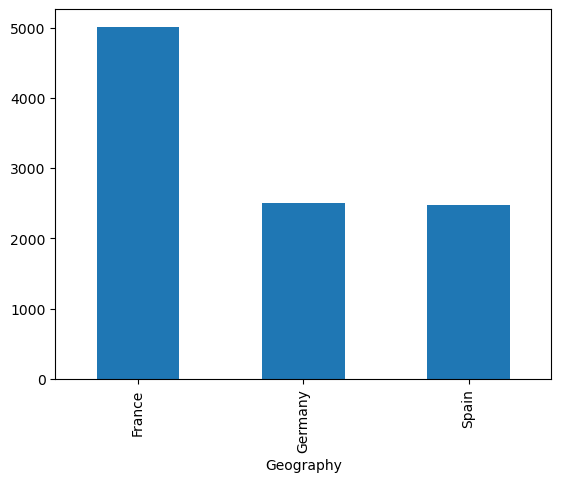

**************************************************
Gender
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


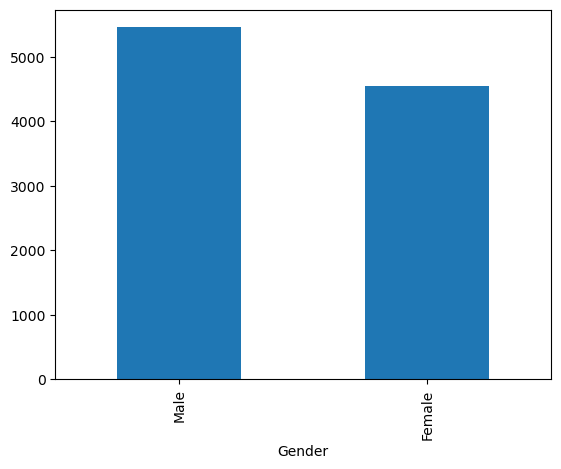

**************************************************
HasCrCard
HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


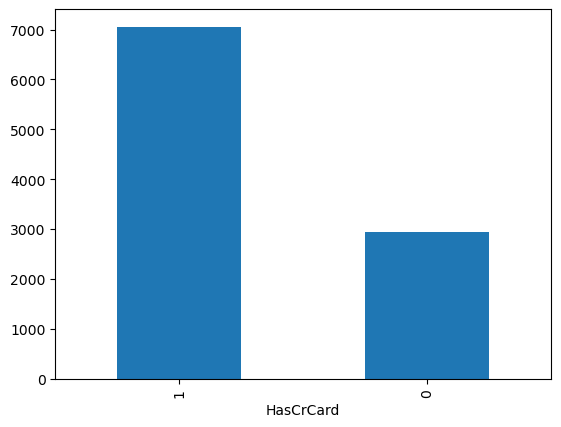

**************************************************
NumOfProducts
NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


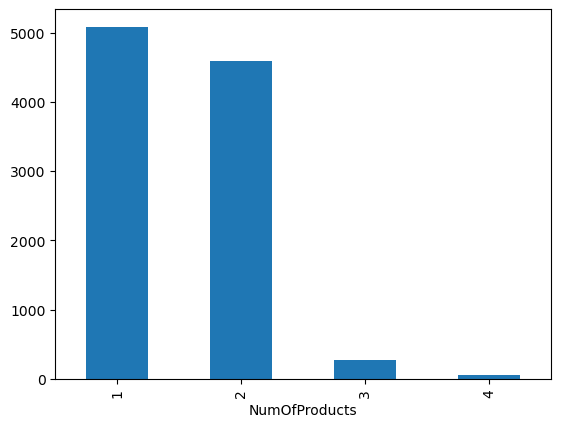

**************************************************
IsActiveMember
IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


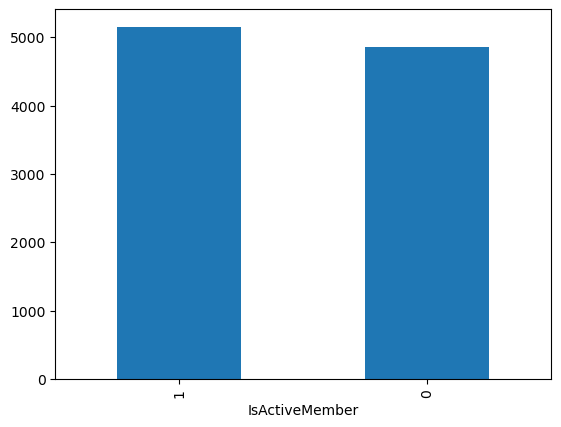

**************************************************
Exited
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


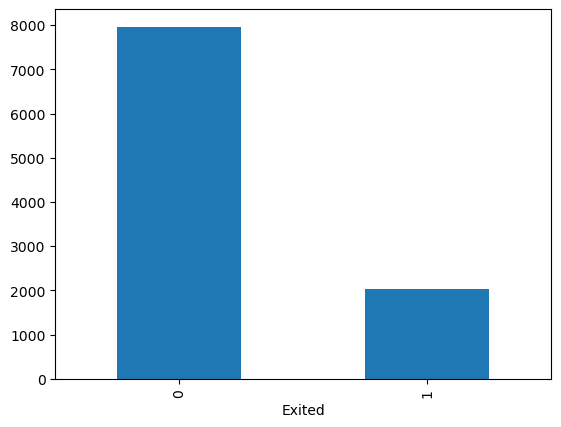

**************************************************
Tenure
Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


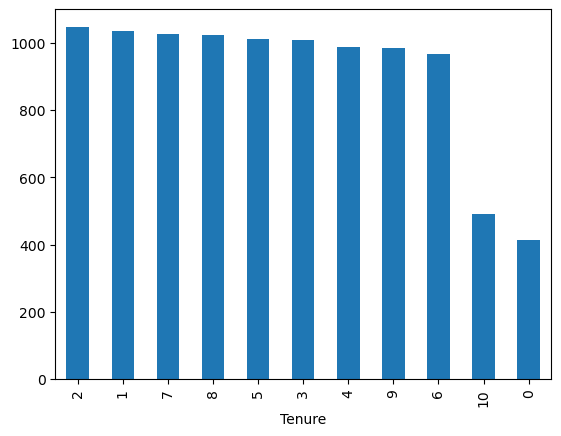

**************************************************


In [13]:
for feat in categorical_variables:
    print(feat)
    print("="*len(feat))
    #print(df[feat].value_counts())
    #print("_"*50)
    print(df[feat].value_counts(normalize=True)*100)
    print("-"*50)
    print(df[feat].value_counts().plot.bar())
    plt.show()
    print("*"*50)

## Numerical Features

EstimatedSalary


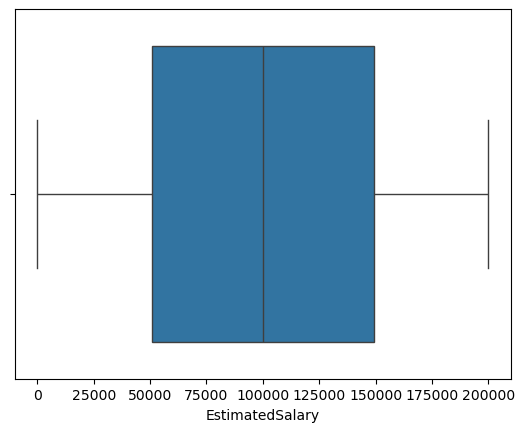

**************************************************
Age


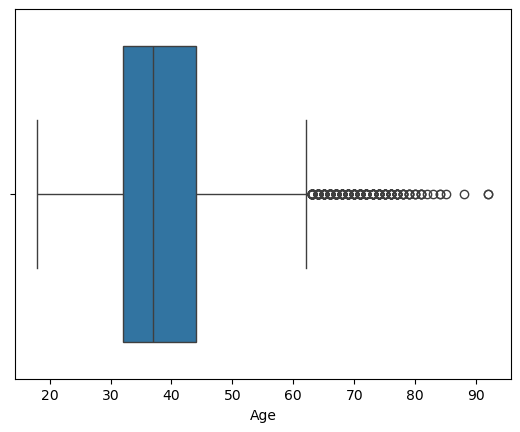

**************************************************
Balance


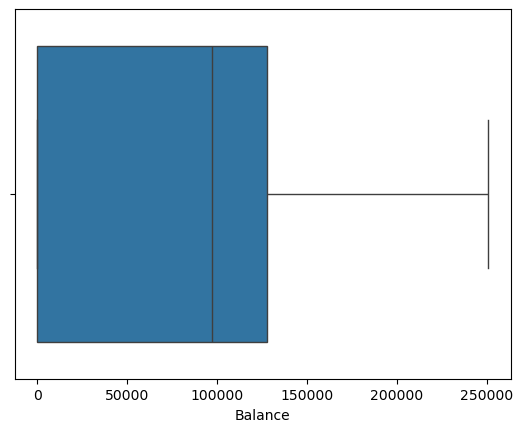

**************************************************
CreditScore


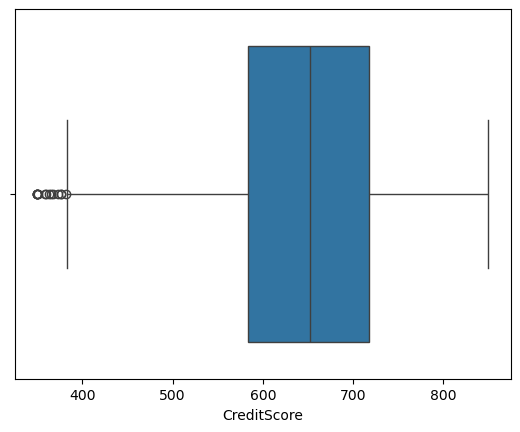

**************************************************


In [14]:
for feat in numerical_variables:
    print(feat)
    sns.boxplot(df[feat], orient='h')
    plt.show()
    print("*"*50)

# Bivarate Analysis - two variables at a time

EstimatedSalary


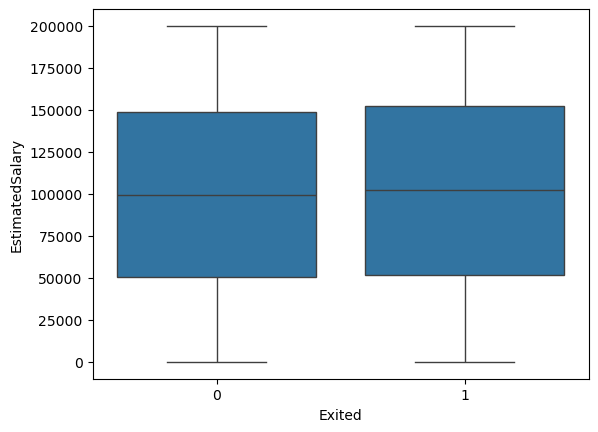

**************************************************
Age


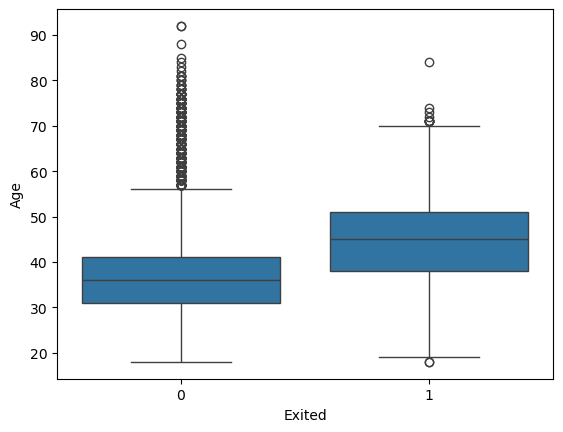

**************************************************
Balance


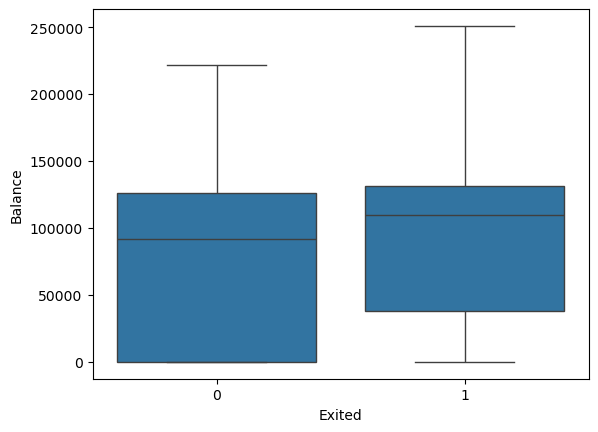

**************************************************
CreditScore


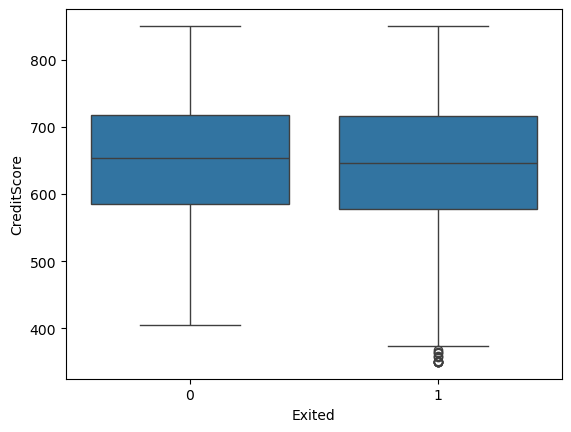

**************************************************


In [15]:
for feat in numerical_variables:
    print(feat)
    sns.boxplot(x='Exited',y=feat,data=df)
    plt.show()
    print("*"*50)

# Multivariate ANalysis

<Axes: >

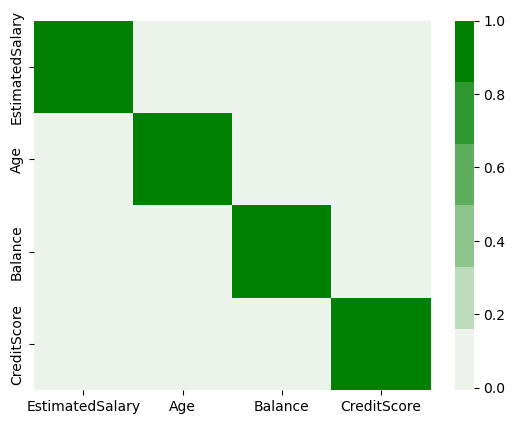

In [16]:
smap=sns.light_palette("green")
sns.heatmap(df[numerical_variables].corr(), cmap=smap)

In [17]:
variable=numerical_variables + ['Exited']

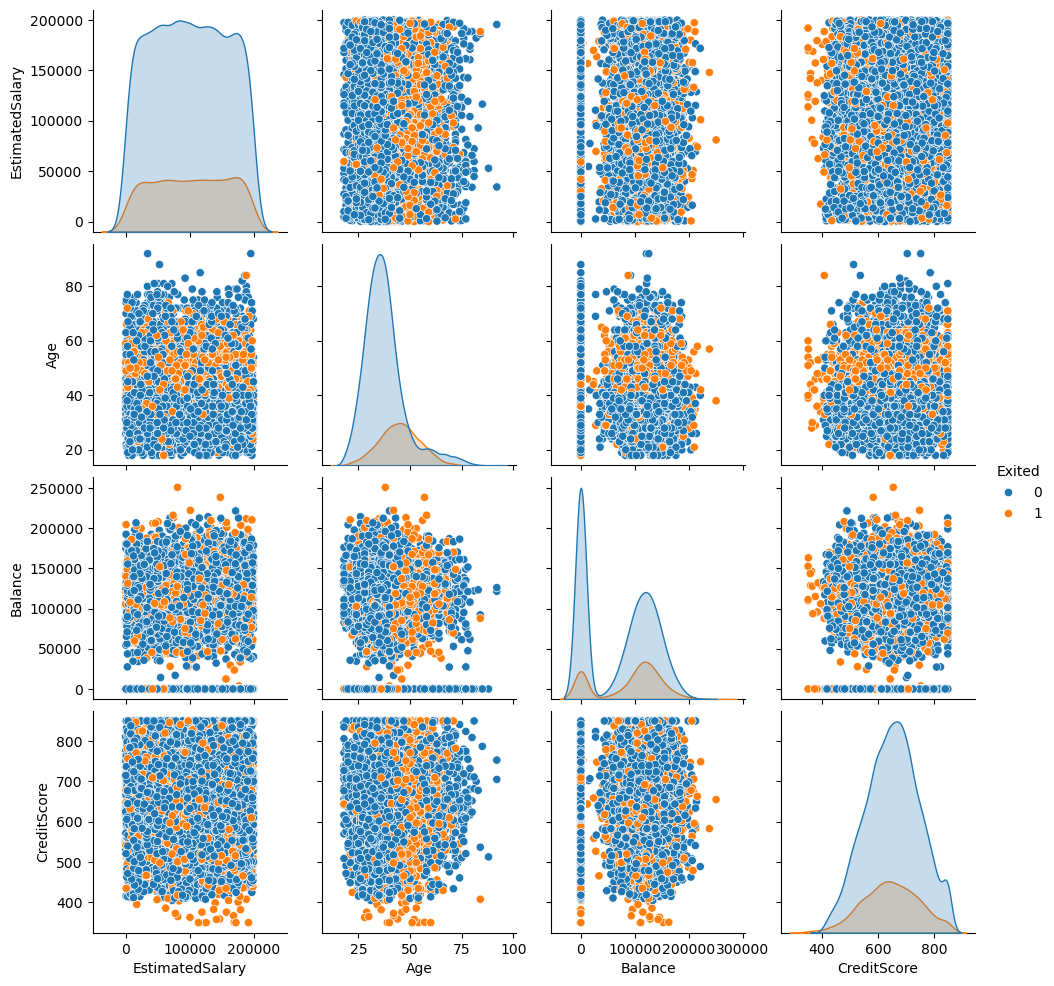

In [18]:
sns.pairplot(df[variable], hue='Exited')

## Modeling

In [19]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
df.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
df['Gender']=df['Gender'].map({'Female':1, 'Male':0}).astype('int')
df['Geography']=df['Geography'].map({'France':0, 'Spain':1, 'Germany':2}).astype('int')

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [23]:
numerical_variables+categorical_variables

['EstimatedSalary',
 'Age',
 'Balance',
 'CreditScore',
 'Geography',
 'Gender',
 'HasCrCard',
 'NumOfProducts',
 'IsActiveMember',
 'Exited',
 'Tenure']

In [24]:
churn = df.loc[:, numerical_variables+categorical_variables]
churn.head()

,EstimatedSalary,Age,Balance,CreditScore,Geography,Gender,HasCrCard,NumOfProducts,IsActiveMember,Exited,Tenure
0,101348.88,42,0.00,619,0,1,1,1,1,1,2
1,112542.58,41,83807.86,608,1,1,0,1,1,0,1
2,113931.57,42,159660.80,502,0,1,1,3,0,1,8
3,93826.63,39,0.00,699,0,1,0,2,0,0,1
4,79084.10,43,125510.82,850,1,1,1,1,1,0,2


In [25]:
X = churn.drop(columns='Exited')
y = churn.loc[:, 'Exited']

In [26]:
X

,EstimatedSalary,Age,Balance,CreditScore,Geography,Gender,HasCrCard,NumOfProducts,IsActiveMember,Tenure
0,101348.88,42,0.00,619,0,1,1,1,1,2
1,112542.58,41,83807.86,608,1,1,0,1,1,1
2,113931.57,42,159660.80,502,0,1,1,3,0,8
3,93826.63,39,0.00,699,0,1,0,2,0,1
4,79084.10,43,125510.82,850,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
9995,96270.64,39,0.00,771,0,0,1,2,0,5
9996,101699.77,35,57369.61,516,0,0,1,1,1,10
9997,42085.58,36,0.00,709,0,1,0,1,1,7
9998,92888.52,42,75075.31,772,2,0,1,2,0,3


In [27]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Train test

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6700, 10), (3300, 10), (6700,), (3300,))

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = clf.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### Model Evaluation

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2657
           1       0.45      0.49      0.47       643

    accuracy                           0.78      3300
   macro avg       0.66      0.67      0.67      3300
weighted avg       0.79      0.78      0.79      3300



## Deep Learning

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [46]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import plot_model

In [47]:
del classifier

In [48]:
classifier = Sequential()

In [51]:
type(classifier)

keras.src.models.sequential.Sequential

In [52]:
X.shape

(10000, 10)

In [53]:
# Input
classifier.add(Dense(10, activation='relu', input_dim=10))
# Hidden
classifier.add(Dense(100, activation='relu'))
classifier.add(Dense(100, activation='relu'))
# Output
classifier.add(Dense(1, activation='sigmoid'))


C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,411 (44.57 KB)

 Trainable params: 11,411 (44.57 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
classifier.fit(X_train, y_train, epochs=10)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7665 - loss: 8425264128.0000
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7913 - loss: 0.5690
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7949 - loss: 0.5334
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7887 - loss: 0.5253
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7960 - loss: 0.5118
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7846 - loss: 0.5223
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7952 - loss: 0.5084
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7895 - loss: 0.5149
Epoch 9/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7853 - loss: 0.5201
Epoch 10/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7942 - loss: 0.5085


In [115]:
!pip install pydot

'C:\Users\arvenka\init.cmd' is not recognized as an internal or external command,
operable program or batch file.


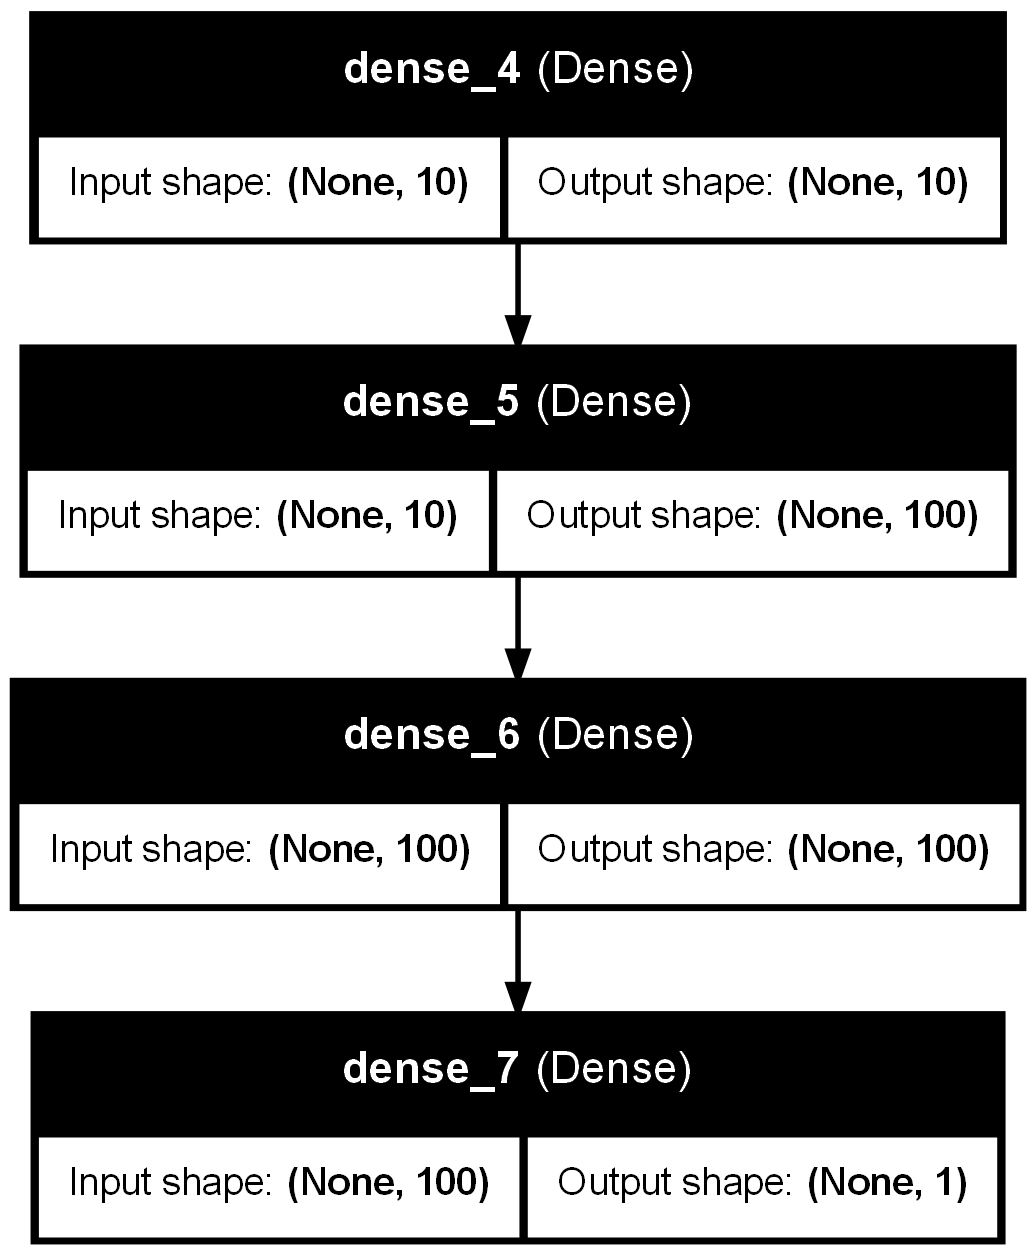

In [57]:
# prompt: Can you plot this model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [58]:
# prompt: Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

Epoch 1/20


C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7732 - loss: 0.5078 - val_accuracy: 0.8370 - val_loss: 0.3997
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8360 - loss: 0.4001 - val_accuracy: 0.8527 - val_loss: 0.3611
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8449 - loss: 0.3727 - val_accuracy: 0.8591 - val_loss: 0.3475
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8484 - loss: 0.3641 - val_accuracy: 0.8603 - val_loss: 0.3431
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8541 - loss: 0.3451 - val_accuracy: 0.8591 - val_loss: 0.3445
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8590 - loss: 0.3289 - val_accuracy: 0.8621 - val_loss: 0.3425
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8593 - loss: 0.3324 - val_accuracy: 0.8645 - val_loss: 0.3391
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8572 - loss: 0.3373 - val_accuracy: 0.8621 - val_

In [61]:
# prompt: Can you improve this model further

# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam'):
  model = Sequential()
  model.add(Dense(64, activation='relu', input_dim=10))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'rmsprop']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_.model
_, accuracy = best_model.evaluate(X_test, y_test)
print('Accuracy of best model: {}'.format(accuracy))


C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\lay

Best: 0.852687 using {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}


AttributeError: 'NoneType' object has no attribute 'evaluate'

In [60]:
!pip install scikeras

'C:\Users\arvenka\init.cmd' is not recognized as an internal or external command,
operable program or batch file.
